In [1]:
!pip install split-folders

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import os
import copy
import torch
from PIL import Image
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
import splitfolders
import torch.nn.functional as F
import pathlib
from torch import optim
import shutil
import csv

In [4]:
# Define directories
output_dir = "/content/dataset/images"  # Structured dataset folder
os.makedirs(output_dir, exist_ok=True)

# Define different percentages of green
percentages = list(range(0, 100, 1))  # 0% to 100% in steps of 10%

# Image size
width, height = 500, 500

# Store labels for CSV
labels = []

for percent_green in percentages:
    percent_brown = 100 - percent_green

    # Determine the green region size
    green_height = int((percent_green / 100) * height)

    # Create an empty image array
    pixels = np.zeros((height, width, 3), dtype=np.uint8)

    # Clustered green area on top, brown area on bottom
    pixels[:green_height, :] = [34, 139, 34]  # Green (#228B22)
    pixels[green_height:, :] = [139, 69, 19]  # Brown (#8B4513)

    # Convert to image
    img = Image.fromarray(pixels)

    # Add text label on image
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("arial.ttf", 30)
    except:
        font = ImageFont.load_default()

    label_text = f"Green: {percent_green}%, Brown: {percent_brown}%"
    draw.text((10, 10), label_text, fill="white", font=font)

    # Save the image with a structured filename
    filename = f"green_{percent_green}_brown_{percent_brown}.png"
    filepath = os.path.join(output_dir, filename)
    img.save(filepath)

    # Append label data for CSV
    labels.append([filename, percent_green])

    print(f"Saved: {filepath}")

print("Image generation complete!")


Saved: /content/dataset/images/green_0_brown_100.png
Saved: /content/dataset/images/green_1_brown_99.png
Saved: /content/dataset/images/green_2_brown_98.png
Saved: /content/dataset/images/green_3_brown_97.png
Saved: /content/dataset/images/green_4_brown_96.png
Saved: /content/dataset/images/green_5_brown_95.png
Saved: /content/dataset/images/green_6_brown_94.png
Saved: /content/dataset/images/green_7_brown_93.png
Saved: /content/dataset/images/green_8_brown_92.png
Saved: /content/dataset/images/green_9_brown_91.png
Saved: /content/dataset/images/green_10_brown_90.png
Saved: /content/dataset/images/green_11_brown_89.png
Saved: /content/dataset/images/green_12_brown_88.png
Saved: /content/dataset/images/green_13_brown_87.png
Saved: /content/dataset/images/green_14_brown_86.png
Saved: /content/dataset/images/green_15_brown_85.png
Saved: /content/dataset/images/green_16_brown_84.png
Saved: /content/dataset/images/green_17_brown_83.png
Saved: /content/dataset/images/green_18_brown_82.png
Sa

In [5]:
# Step 2: Create Labels CSV File
csv_path = "/content/dataset/labels.csv"
with open(csv_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["filename", "green_percentage"])  # Header
    writer.writerows(labels)

print(f"Labels CSV saved at: {csv_path}")


Labels CSV saved at: /content/dataset/labels.csv


In [6]:
# Step 3: Split Dataset into Train and Validation Sets

splitfolders.ratio(
    "/content/dataset",  # Input folder (must contain subfolders)
    output="/content/area",  # Output directory
    seed=41,
    ratio=(0.8, 0.2),  # 80% Train, 20% Validation
    group_prefix=None
)

print("Data successfully split into training and validation sets!")


Copying files: 100 files [00:00, 4014.57 files/s]

Data successfully split into training and validation sets!


In [7]:
import pandas as pd

In [8]:
# Define risk classification function
def classify_risk(brown_percent):
    if brown_percent <= 33:
        return "🟢"
    elif 34 <= brown_percent <= 66:
        return "🟠"
    else:
        return "🔴"

# Create risk classification table
risk_data = []

for percent_green in range(0, 100, 1):  # 0% to 100% in steps of 10%
    percent_brown = 100 - percent_green
    risk_label = classify_risk(percent_brown)
    risk_data.append([percent_green, percent_brown, risk_label])

# Convert to Pandas DataFrame
df = pd.DataFrame(risk_data, columns=["Green %", "Brown %", "Risk Level"])

# Save to CSV
csv_path = "/content/dataset/risk_labels.csv"
df.to_csv(csv_path, index=False)


In [9]:
# Display the risk table
print("Risk classification table:")
print(df)

✅ Risk classification table:
    Green %  Brown %         Risk Level
0         0      100  High Risk (Red 🔴)
1         1       99  High Risk (Red 🔴)
2         2       98  High Risk (Red 🔴)
3         3       97  High Risk (Red 🔴)
4         4       96  High Risk (Red 🔴)
..      ...      ...                ...
95       95        5     Safe (Green 🟢)
96       96        4     Safe (Green 🟢)
97       97        3     Safe (Green 🟢)
98       98        2     Safe (Green 🟢)
99       99        1     Safe (Green 🟢)

[100 rows x 3 columns]


<ipython-input-10-1e61fac40415>:27: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-1e61fac40415>:27: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-1e61fac40415>:27: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

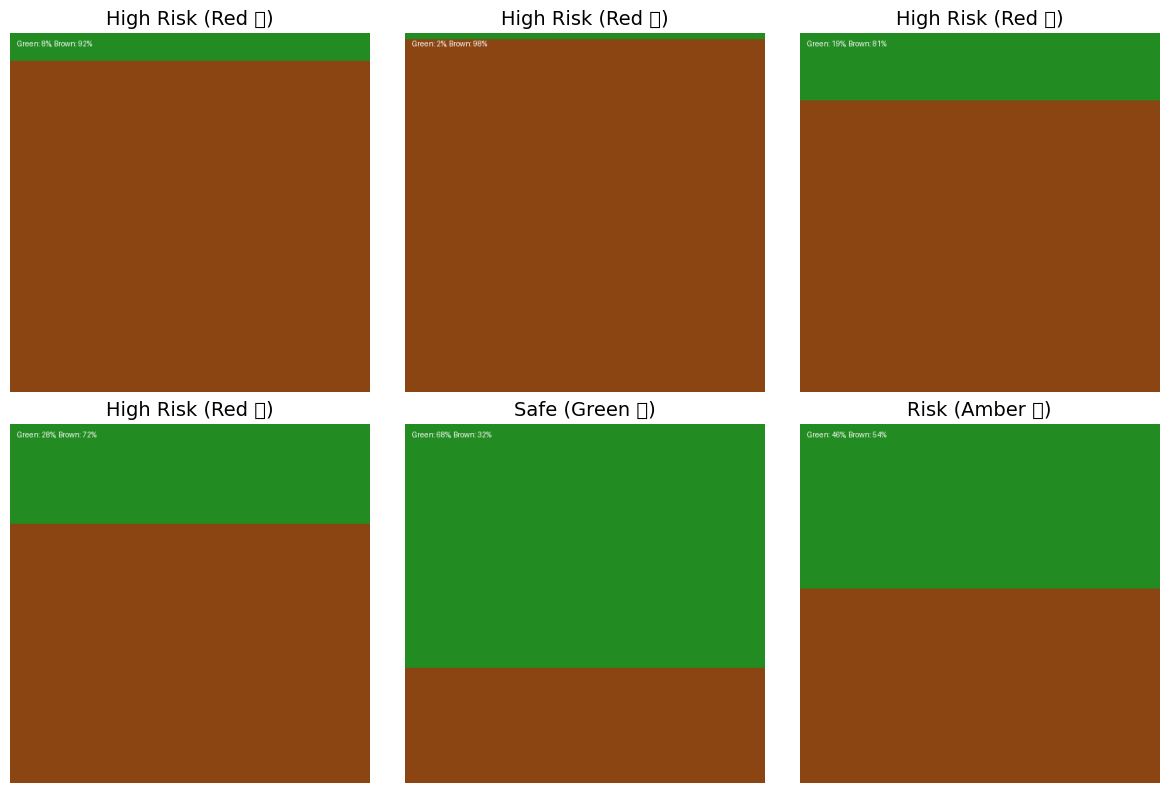

In [10]:
# Load the risk labels CSV
csv_path = "/content/dataset/risk_labels.csv"
df = pd.read_csv(csv_path)

# Define the image directory
image_dir = "/content/dataset/images"

# Select a few images to display
sample_images = df.sample(6)  # Randomly select 6 images

# Plot images with their risk labels
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

for i, (idx, row) in enumerate(sample_images.iterrows()):
    filename = f"green_{row['Green %']}_brown_{row['Brown %']}.png"
    img_path = os.path.join(image_dir, filename)

    # Load image
    img = Image.open(img_path)
    # Show image
    ax = axes[i // 3, i % 3]  # Get subplot position
    ax.imshow(img)
    ax.set_title(f"{row['Risk Level']}", fontsize=14)
    ax.axis("off")  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()

## **DNN to help classify a given area into risk**

In [11]:
# Change last column from strings to integers
df['Risk Level'] = df['Risk Level'].replace('🟢', 0)
df['Risk Level'] = df['Risk Level'].replace('🟠', 1)
df['Risk Level'] = df['Risk Level'].replace('🔴', 2)

# X is all columns except the species
X = df.drop('Risk Level', axis=1).values
y = df['Risk Level'].values

<ipython-input-11-cde5983a144f>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Risk Level'] = df['Risk Level'].replace('High Risk (Red 🔴)', 2)


In [12]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [13]:
# Convert to tensors
# Need to calculate gradients so set to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

tensor([[86., 14.],
        [48., 52.],
        [49., 51.],
        [99.,  1.],
        [41., 59.],
        [18., 82.],
        [87., 13.],
        [40., 60.],
        [91.,  9.],
        [67., 33.],
        [ 7., 93.],
        [63., 37.],
        [11., 89.],
        [76., 24.],
        [83., 17.],
        [29., 71.],
        [90., 10.],
        [66., 34.],
        [15., 85.],
        [82., 18.],
        [81., 19.],
        [62., 38.],
        [96.,  4.],
        [ 9., 91.],
        [14., 86.],
        [95.,  5.],
        [69., 31.],
        [38., 62.],
        [10., 90.],
        [ 8., 92.],
        [47., 53.],
        [77., 23.],
        [21., 79.],
        [31., 69.],
        [30., 70.],
        [43., 57.],
        [36., 64.],
        [45., 55.],
        [46., 54.],
        [73., 27.],
        [22., 78.],
        [44., 56.],
        [74., 26.],
        [39., 61.],
        [ 5., 95.],
        [20., 80.],
        [71., 29.],
        [88., 12.],
        [97.,  3.],
        [ 1., 99.],


In [14]:
# Convert labels to tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
from torch.utils.data import TensorDataset, DataLoader
train_ds = TensorDataset(X_train, y_train)
batch_size = 15
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[61., 39.],
         [99.,  1.],
         [43., 57.],
         [ 5., 95.],
         [56., 44.],
         [92.,  8.],
         [40., 60.],
         [77., 23.],
         [58., 42.],
         [65., 35.],
         [26., 74.],
         [41., 59.],
         [91.,  9.],
         [51., 49.],
         [48., 52.]]),
 tensor([1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1])]

0.4896238446235657
0.06561410427093506
0.0986829325556755
0.00791780836880207
0.05327960103750229
0.0018059222493320704
0.0011741177877411246
0.017034105956554413
0.003978104796260595
0.004799762275069952


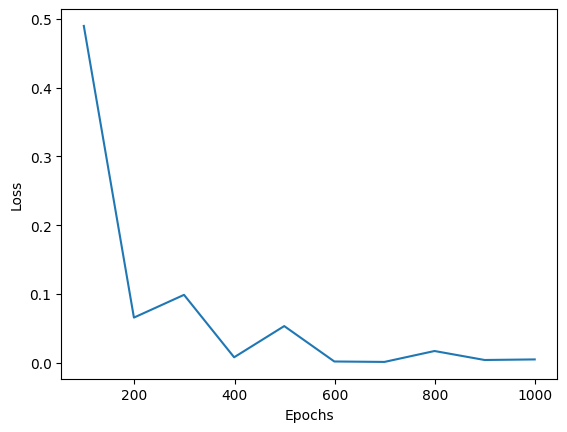

tensor([[ -4.7741,   3.3346,  -5.3240],
        [ 11.8405,  -4.1667, -18.5789],
        [ -4.6269,   2.7270,  -1.4274],
        [ -6.3490,   1.5915,  14.2844],
        [  8.4661,  -2.6228, -16.0526],
        [ -4.4797,   2.1194,   2.4692],
        [ -4.6694,   1.5325,   7.6334],
        [ -6.8524,   1.7195,  15.4585],
        [ -4.5092,   2.2409,   1.6898],
        [ 11.6805,  -4.1017, -18.3992],
        [  2.2822,   0.6441, -14.5995],
        [ -3.4381,   3.7199, -13.6464],
        [ -4.1004,   3.9670, -12.7447],
        [ -6.6734,   1.6741,  15.0402],
        [ -4.4694,   4.0349, -11.7353],
        [  4.9710,  -0.7967, -15.0844],
        [  8.2365,  -2.5172, -15.8850],
        [ -5.4105,   1.4632,  11.2774],
        [ -4.5767,   1.5412,   7.1779],
        [ -4.3914,   1.5585,   6.2669]], grad_fn=<AddmmBackward0>)


In [16]:
class DNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(2, 8)
    self.act1 = nn.ReLU()
    self.linear2 = nn.Linear(8, 6)
    self.act2 = nn.ReLU()
    self.linear3 = nn.Linear(6, 4)
    self.act3 = nn.ReLU()
    self.linear4 = nn.Linear(4, 3)

  def forward(self, x):
    x = self.linear1(x)
    x = self.act1(x)
    x = self.linear2(x)
    x = self.act2(x)
    x = self.linear3(x)
    x = self.act3(x)
    x = self.linear4(x)
    return x

lr = 0.001
model = DNN()
mse = torch.nn.CrossEntropyLoss()
opt_SGD = torch.optim.SGD(model.parameters(), lr = lr)
losses = []
epochs_lst = []
# Training step
def fit(num_epochs, model, loss_fn, opt, train_dl):
  for epoch in range(num_epochs):
    for xb, yb in train_dl:
      preds = model(xb)
      loss = loss_fn(preds, yb)
      loss.backward()
      opt.step()
      opt.zero_grad()
    # Logging every 50 epochs
    if epoch % 50 == 0:
        avg_loss = epoch_loss / len(train_dl)
        print(f"Epoch {epoch}: Loss = {avg_loss:.4f}")
        losses.append(avg_loss)
        epochs_lst.append(epoch)


def drawGraph(losses, epoches_lst):
  plt.plot(epochs_lst, losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()


fit(1000, model, mse, opt_SGD, train_dl)
drawGraph(losses, epochs_lst)
preds = model(X_test)
print(preds)

In [18]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Put model in evaluation mode (disables dropout, batch norm updates)
model.eval()

test_preds = model(X_test)  # Get raw logits
predicted_labels = torch.argmax(test_preds, axis=1)  # Convert logits to class indices

# Convert tensors to numpy arrays for accuracy calculation
actual_labels = y_test.numpy()
predicted_labels = predicted_labels.numpy()

# Calculate Accuracy
accuracy = accuracy_score(actual_labels, predicted_labels) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Create a DataFrame to compare Actual vs. Predicted Labels
results_df = pd.DataFrame({
    "Green %": X_test[:, 0].numpy(),  # Assuming column 0 is Green %
    "Brown %": X_test[:, 1].numpy(),
    "Actual Label": actual_labels,
    "Predicted Label": predicted_labels
})

# Print 20 random rows from the results DataFrame
print(results_df.sample(20, random_state=42))  # Random selection for consistency

Model Accuracy: 95.00%
    Green %  Brown %  Actual Label  Predicted Label
0      42.0     58.0             1                1
17     16.0     84.0             2                2
15     72.0     28.0             0                0
1      94.0      6.0             0                0
8      33.0     67.0             2                1
5      32.0     68.0             2                2
11     60.0     40.0             1                1
3       6.0     94.0             2                2
18     25.0     75.0             2                2
16     78.0     22.0             0                0
13      2.0     98.0             2                2
2      37.0     63.0             1                1
9      93.0      7.0             0                0
19     27.0     73.0             2                2
4      79.0     21.0             0                0
12     57.0     43.0             1                1
7       0.0    100.0             2                2
10     68.0     32.0             0       

## **Wider Data Set DNN**

In [19]:
import pandas as pd
import numpy as np

In [20]:
output_dir = "/content/dataset/large_dataset"  # Structured dataset folder
os.makedirs(output_dir, exist_ok=True)

In [21]:
# Function to calculate the risk score
def calculate_risk_score(green_percent, temp, humidity, wind_speed):
    brown_percent = 100 - green_percent  # Brown = Inverse of green

    # Green/Brown Impact: Larger brown area increases risk
    brown_score = brown_percent / 100

    # Temperature: Scale temperature to range [0, 1], assuming range 20°C to 45°C
    temp_score = (temp - 20) / (45 - 20)

    # Humidity: Low humidity increases risk, so we scale it to [0, 1] in reverse
    humidity_score = (100 - humidity) / 100

    # Wind Speed: Strong winds increase risk, so we scale to [0, 1] in normal order
    wind_score = wind_speed / 35

    # Calculate the final risk score by combining factors
    # You can adjust these weights to tune the sensitivity of each factor
    final_score = (0.4 * brown_score) + (0.3 * temp_score) + (0.2 * humidity_score) + (0.1 * wind_score)

    return final_score

# Function to classify risk based on the final score
def classify_risk(score):
    if score <= 0.33:
        return "🟢"
    elif 0.34 <= score <= 0.66:
        return "🟠"
    else:
        return "🔴"

# Generate data with varying conditions
data = []

for green_percent in range(1, 101):  # 1% to 100% Green Coverage
    for i in range(5):  # Generate 5 variations per green percentage
        temp = np.random.uniform(20, 45)  # Random temperature between 20-45°C
        humidity = np.random.uniform(10, 90)  # Random humidity between 10-90%
        wind_speed = np.random.uniform(5, 35)  # Random wind speed between 5-35 km/h

        # Calculate the risk score based on the factors
        risk_score = calculate_risk_score(green_percent, temp, humidity, wind_speed)

        # Classify the risk based on the final score
        risk_label = classify_risk(risk_score)

        data.append([green_percent, 100 - green_percent, temp, humidity, wind_speed, risk_score, risk_label])

# Create DataFrame
df = pd.DataFrame(data, columns=["Green %", "Brown %", "Temperature (°C)", "Humidity (%)", "Wind Speed (km/h)", "Risk Score", "Risk Level"])

# Save as CSV
csv_path = "/content/dataset/large_dataset/risk_labels.csv"
df.to_csv(csv_path, index=False)

# Display a sample of the dataset
print("wildfire risk dataset generated!")
print(df)

wildfire risk dataset generated!
     Green %  Brown %  Temperature (°C)  Humidity (%)  Wind Speed (km/h)  \
0          1       99         29.338950     87.628209          18.740866   
1          1       99         23.027573     73.073982          10.214798   
2          1       99         22.730863     50.759592          29.827178   
3          1       99         32.148322     76.029072          34.532198   
4          1       99         26.906977     14.512016          16.664567   
..       ...      ...               ...           ...                ...   
495      100        0         36.961882     85.183415          18.058085   
496      100        0         39.263946     25.110454          26.582721   
497      100        0         31.520682     69.268124          21.871579   
498      100        0         36.534188     59.981279          17.935130   
499      100        0         24.821457     72.855496          33.402217   

     Risk Score Risk Level  
0      0.586356          

In [22]:
# Change last column from strings to integers
df['Risk Level'] = df['Risk Level'].replace('🟢', 0)
df['Risk Level'] = df['Risk Level'].replace('🟠', 1)
df['Risk Level'] = df['Risk Level'].replace('🔴', 2)

# X is all columns except the species
X = df.drop(labels = ['Risk Level', 'Risk Score'],axis=1).values
y = df['Risk Level'].values
print(X)

[[  1.          99.          29.33895003  87.62820866  18.7408664 ]
 [  1.          99.          23.02757279  73.07398198  10.2147983 ]
 [  1.          99.          22.73086283  50.7595919   29.82717766]
 ...
 [100.           0.          31.52068153  69.26812392  21.87157852]
 [100.           0.          36.53418802  59.98127899  17.93513042]
 [100.           0.          24.82145684  72.85549637  33.40221695]]


<ipython-input-22-58796cfe936c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Risk Level'] = df['Risk Level'].replace('🔴', 2)


In [23]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [24]:
# Convert to tensors
# Need to calculate gradients so set to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_train

tensor([[32.0000, 68.0000, 30.9834, 42.4878,  9.8238],
        [29.0000, 71.0000, 24.5080, 74.3848,  6.4310],
        [23.0000, 77.0000, 26.9466, 44.2831,  5.4274],
        ...,
        [80.0000, 20.0000, 28.9339, 71.5363, 34.4064],
        [84.0000, 16.0000, 30.4288, 69.2631, 16.8947],
        [90.0000, 10.0000, 35.5139, 49.3162, 16.6162]])

In [25]:
# Convert labels to tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [26]:
from torch.utils.data import TensorDataset, DataLoader
train_ds = TensorDataset(X_train, y_train)
batch_size = 15
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[91.0000,  9.0000, 26.5758, 12.3305, 12.0327],
         [60.0000, 40.0000, 28.5547, 34.5628, 26.4584],
         [50.0000, 50.0000, 31.3831, 87.3697, 13.7924],
         [55.0000, 45.0000, 28.9308, 51.2642, 17.2346],
         [63.0000, 37.0000, 23.4020, 39.9535, 21.8761],
         [10.0000, 90.0000, 28.4930, 17.0946, 34.5135],
         [79.0000, 21.0000, 43.9103, 11.4413, 26.4728],
         [30.0000, 70.0000, 37.2726, 42.9248, 14.0880],
         [ 2.0000, 98.0000, 43.8398, 15.9190, 31.8608],
         [64.0000, 36.0000, 28.9254, 67.0109, 27.2213],
         [95.0000,  5.0000, 40.7656, 31.9701, 20.3059],
         [17.0000, 83.0000, 40.7009, 10.1983, 33.6813],
         [33.0000, 67.0000, 42.4257, 19.8485,  8.6026],
         [38.0000, 62.0000, 39.1377, 12.8130, 18.8559],
         [14.0000, 86.0000, 44.4832, 27.8683, 27.3018]]),
 tensor([0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2])]

Epoch 0: Loss = 1.2416
Epoch 50: Loss = 0.5562
Epoch 100: Loss = 0.3604
Epoch 150: Loss = 0.2405
Epoch 200: Loss = 0.1625
Epoch 250: Loss = 0.1364
Epoch 300: Loss = 0.1127
Epoch 350: Loss = 0.1227
Epoch 400: Loss = 0.1058
Epoch 450: Loss = 0.0858
Epoch 500: Loss = 0.0820
Epoch 550: Loss = 0.0838
Epoch 600: Loss = 0.0939
Epoch 650: Loss = 0.0855
Epoch 700: Loss = 0.0749
Epoch 750: Loss = 0.0787
Epoch 800: Loss = 0.0839
Epoch 850: Loss = 0.0730
Epoch 900: Loss = 0.0760
Epoch 950: Loss = 0.0678


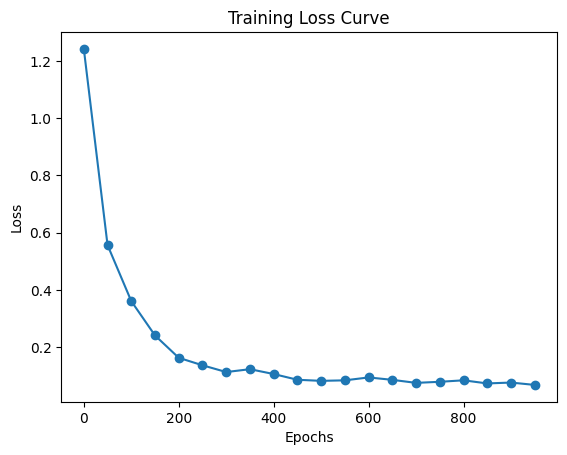

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the Neural Network
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(5, 8)
        self.act1 = nn.ReLU()

        self.linear2 = nn.Linear(8, 6)
        self.act2 = nn.ReLU()

        self.linear3 = nn.Linear(6, 4)
        self.act3 = nn.ReLU()

        self.linear4 = nn.Linear(4, 3)

    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)

        x = self.linear2(x)
        x = self.act2(x)

        x = self.linear3(x)
        x = self.act3(x)

        x = self.linear4(x)  # Output raw logits
        return x

# Initialize Model, Loss Function, and Optimizer
lr = 0.001
model = DNN()
loss_fn = nn.CrossEntropyLoss()  # CrossEntropy handles softmax internally
optimizer = optim.Adam(model.parameters(), lr=lr)  # Faster convergence

# Training Function

losses = []
epochs_lst = []

def fit(num_epochs, model, loss_fn, optimizer, train_dl):
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for xb, yb in train_dl:
            preds = model(xb)  # Forward pass
            loss = loss_fn(preds, yb)  # Compute loss

            optimizer.zero_grad()  # Clear gradients
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            epoch_loss += loss.item()  # Track loss

        # Logging every 50 epochs
        if epoch % 50 == 0:
            avg_loss = epoch_loss / len(train_dl)
            print(f"Epoch {epoch}: Loss = {avg_loss:.4f}")
            losses.append(avg_loss)
            epochs_lst.append(epoch)

# Train Model
fit(1000, model, loss_fn, optimizer, train_dl)

# Plot Loss Curve
def drawGraph(losses, epochs_lst):
    plt.plot(epochs_lst, losses, marker='o', linestyle='-')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.show()

drawGraph(losses, epochs_lst)


In [28]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Put model in evaluation mode (disables dropout, batch norm updates)
model.eval()

test_preds = model(X_test)  # Get raw logits
predicted_labels = torch.argmax(test_preds, axis=1)  # Convert logits to class indices

# Convert tensors to numpy arrays for accuracy calculation
actual_labels = y_test.numpy()
predicted_labels = predicted_labels.numpy()

# Calculate Accuracy
accuracy = accuracy_score(actual_labels, predicted_labels) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Create a DataFrame to compare Actual vs. Predicted Labels
results_df = pd.DataFrame({
    "Green %": X_test[:, 0].numpy(),  # Assuming column 0 is Green %
    "Brown %": X_test[:, 1].numpy(),
    "Temperature (°C)": X_test[:, 2].numpy(),
    "Humidity (%)": X_test[:, 3].numpy(),
    "Wind Speed (km/h)": X_test[:, 4].numpy(),
    "Actual Label": actual_labels,
    "Predicted Label": predicted_labels
})

# Print 20 random rows from the results DataFrame
print(results_df.sample(20, random_state=42))  # Random selection for consistency


Model Accuracy: 99.00%
    Green %  Brown %  Temperature (°C)  Humidity (%)  Wind Speed (km/h)  \
83     34.0     66.0         22.476944     21.959318          22.784052   
53     50.0     50.0         24.873283     41.799896          31.128017   
70      1.0     99.0         29.338949     87.628212          18.740866   
45     78.0     22.0         20.573017     58.944965          29.481781   
44     55.0     45.0         42.731728     26.082029          27.846771   
39     54.0     46.0         33.175297     72.497696          30.103466   
22     62.0     38.0         25.987194     36.772472          13.067519   
80     89.0     11.0         43.164845     63.423912          10.930847   
10     73.0     27.0         24.062576     45.694153          10.279044   
0      40.0     60.0         34.549492     66.575607          10.368484   
18      6.0     94.0         24.978689     50.889385           8.694849   
30      5.0     95.0         44.920532     31.727385          20.938707   
73